In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import cv2

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

In [4]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total}%")

In [5]:
def visualize_weights(model):
    weights = model.fc1.weight.data.numpy()
    fig, axes = plt.subplots(8, 16, figsize=(10, 5))
    for i, ax in enumerate(axes.ravel()):
        if i < 128:
            ax.matshow(weights[i].reshape(28, 28), cmap='viridis')
            ax.axis('off')
    plt.show()

In [6]:
def predict_custom_digit(model, image):
    model.eval()
    with torch.no_grad():
        image = transform(image).unsqueeze(0)
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
    return predicted.item()

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:13<00:00, 761027.35it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 111102.27it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 951357.49it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 302562.24it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [8]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [43]:
# model training
train_model(model, train_loader, criterion, optimizer)
evaluate_model(model, test_loader)

Epoch 1, Loss: 0.07470737970339805
Epoch 2, Loss: 0.06635984476940679
Epoch 3, Loss: 0.05628806628015782
Epoch 4, Loss: 0.0513075359016364
Epoch 5, Loss: 0.043798610915430886
Accuracy: 97.34%


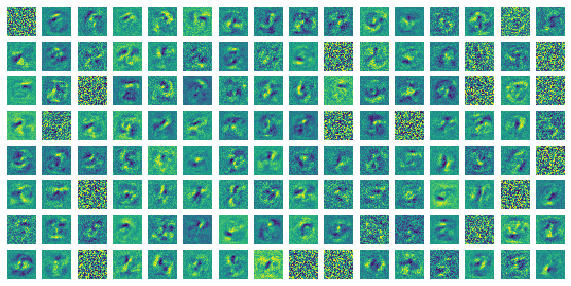

In [41]:
## visulize the models
visualize_weights(model)

In [42]:
path = 'data/test/2.png'
image = cv2.imread(path)
resized_image = cv2.resize(image, (28, 28))
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
normalized_image = grayscale_image / 255.0
normalized_image = normalized_image.astype(np.float32)
input_image = np.expand_dims(normalized_image, axis=0)
print("Predicted Digit:", predict_custom_digit(model, input_image))

Predicted Digit: 2
